In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import torch

The data

The files station_locs.pt and weather_data.pt contain the location and temperature information in 339 weather stations in North America. The data was obtained from NOAA.
The complete package can be found in
https://github.com/meteostat/meteostat-python

We will use this data to analyze weather patterns and predictions. In the next cell we download and plot the data.

The data has 10 different columns:

'tavg' = Average  temp

'tmin' = Min  temp

'tmax' = Max  temp

'prcp' = Precipitation

'snow' = Snow

'wdir' = Wind direction

'wspd' = Wind Speed

'wpgt' = The dew point in °C  

'pres' = The average sea-level air pressure in hPa

'tsun' = The one hour sunshine total in minutes (m)



In [ ]:
print (Data[0,:,1])
print (Data.shape)

tensor([ -0.6400,   1.4803,   1.6030,   1.3311,   1.6683,   0.9263,   1.2582,
          1.3403,   0.5151,   1.5175,   1.0101,   1.5463,   1.4489,   1.8226,
          0.6075,  -0.4892,  -0.6145,   0.3774,  -0.5851,   1.6049,   1.6575,
          1.2385,  -0.9315,  -0.0964,   3.3000,  -0.2888,  -0.5299,   1.7351,
          1.7377,   1.7339,   1.7546,   1.4063,   0.2838,   1.5001,   1.3908,
          1.7166,   1.2801,   1.6694,   1.7395,   1.8000,   0.5000,   1.6984,
          1.6031,   1.5000,   1.2242,  -0.5345,   1.6934,   1.3681,   3.5000,
          1.3478,  -0.5705,   1.7361,   3.6000,   1.5824,   1.5933,   1.7578,
         -0.5586,  -0.6110,  -0.3707,   1.7832,   1.7327,   1.7359,  -0.6033,
          2.0000,   0.9263,   1.4875,   2.0000,   3.0000,   0.0000,   0.4961,
          2.1031,   0.8200,   1.7108,   1.7161,   1.6918,   1.7350,   1.7549,
          0.0780,   1.6993,   1.5447,   1.1512,   1.4840,  -0.6254,   1.5111,
         -0.4864,   1.5175,   1.2726,   1.6722,  -0.5821,   0.60

<ipython-input-21-8e17ef512978>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  station_locs = torch.load('station_locs.pt') # matrix of 2 columns, location and temprature,

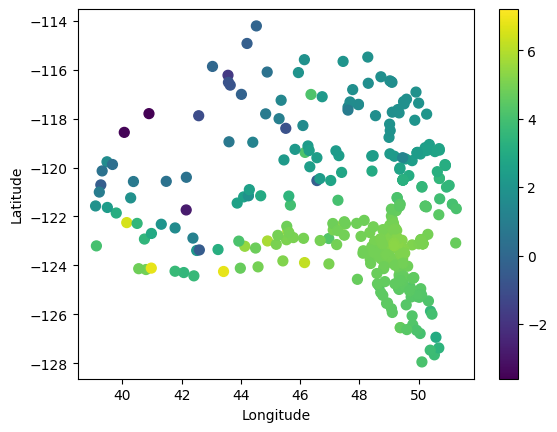

In [ ]:
station_locs = torch.load('station_locs.pt') # matrix of 2 columns, location and temprature, 339 rows (each station)
Data = torch.load('weather_data (3).pt')


# Plot the ave temperature for the 0th date
map = Data[0,:,0]
plt.scatter(station_locs[:,0], station_locs[:,1], c=map, cmap='viridis',s=50) # (0 is x-axis) (1 is Y-axis)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

#print (station_locs[:,1]) # rows and columns:
#1, [:,:] the whole station.
#2, [:,0] give me an array of my location (because it's 0) of stations.
#4, [:,1] give me an array of my temprature (because it's 1) of stations.
#3, [0,:]


Go to office hours for this


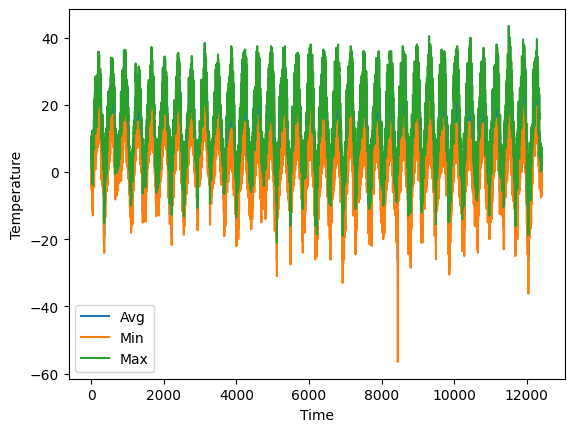

In [ ]:
# plot the time series for the temperature at the first station
plt.plot(Data[:,0,0])
plt.plot(Data[:,0,1])
plt.plot(Data[:,0,2])

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(['Avg','Min','Max'])

**Questions 1-2**

1. Use the scatter plot similar to the one above to plot the pressure map in all stations

2. Plot a time series for the pressure at station 0 over time - The data has a clear problem. Can you identify a problem with the data?



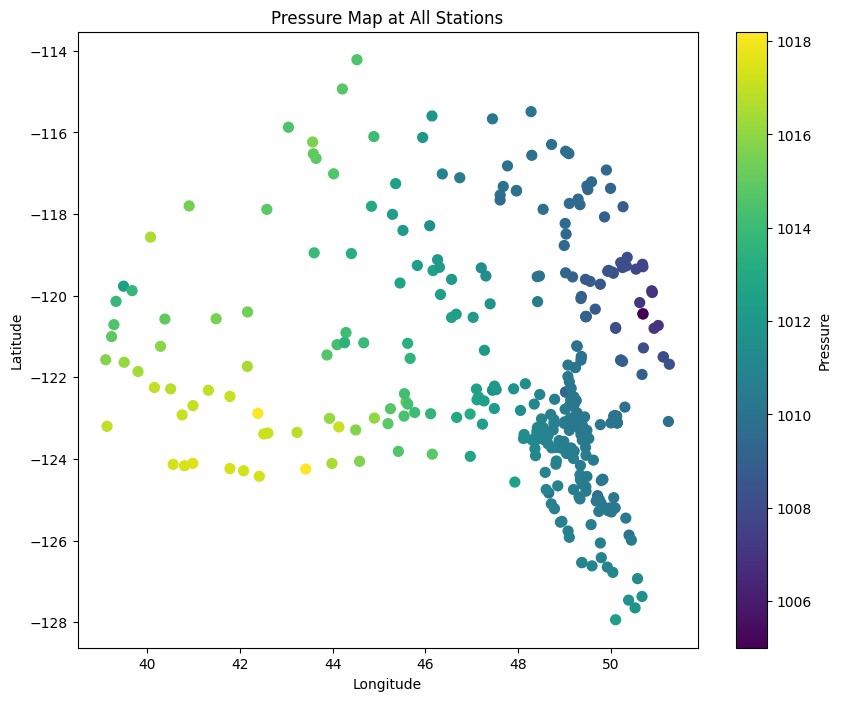

In [ ]:
# Number 1
pressure = Data[0,:,8]

plt.figure(figsize=(10, 8))
plt.scatter(station_locs[:, 0], station_locs[:, 1], c=pressure, cmap='viridis', s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pressure Map at All Stations')
plt.colorbar(label='Pressure')
#plt.show()


torch.Size([12419])


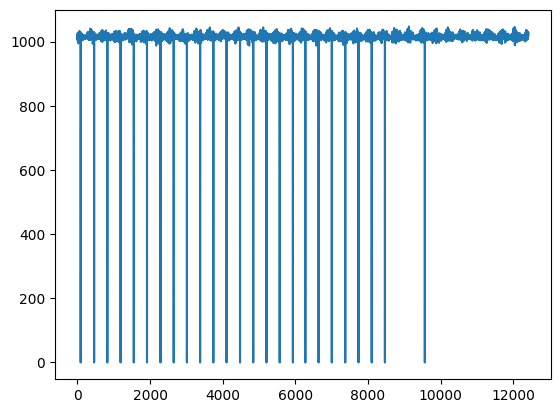

In [ ]:
# Number 2
pressure_station_0 = Data[:, 0, 8]

plt.plot(Data[:,0,8])
print (pressure_station_0.shape)
#time_steps = np.arange(len(pressure_station_0))

#plt.figure(figsize=(10, 6))
#plt.plot(time_steps, pressure_station_0, label='Pressure at Station 0')
#plt.xlabel('Time Steps')
#plt.ylabel('Pressure')



We are going to solve the problem with the data by changing the data in the problematic locations.
First, we identify the spots in the vector that are problematic. We then replace them with an average of their neiboughrs

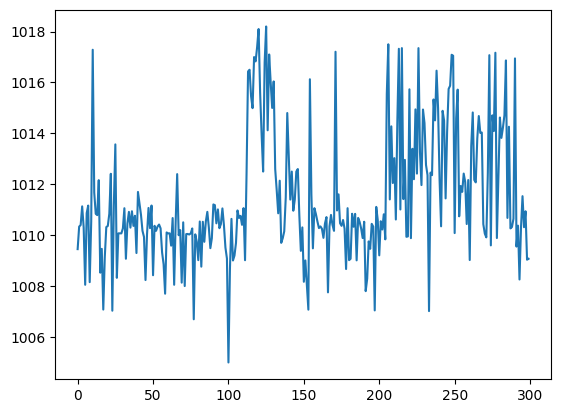

In [ ]:
ind = torch.where(pressure==0)[0]
pressure[ind] = (pressure[ind+1] + pressure[ind-1])/2
plt.plot(pressure[:300])

**Question 3**

Reorganize the pressure as a matrix of 365 (days) and 34 years. Average over the days of the year and plot a graph of the average pressure over the years.
Is the pressure increasing/decreasing or inconclusive

torch.Size([34, 365, 339])


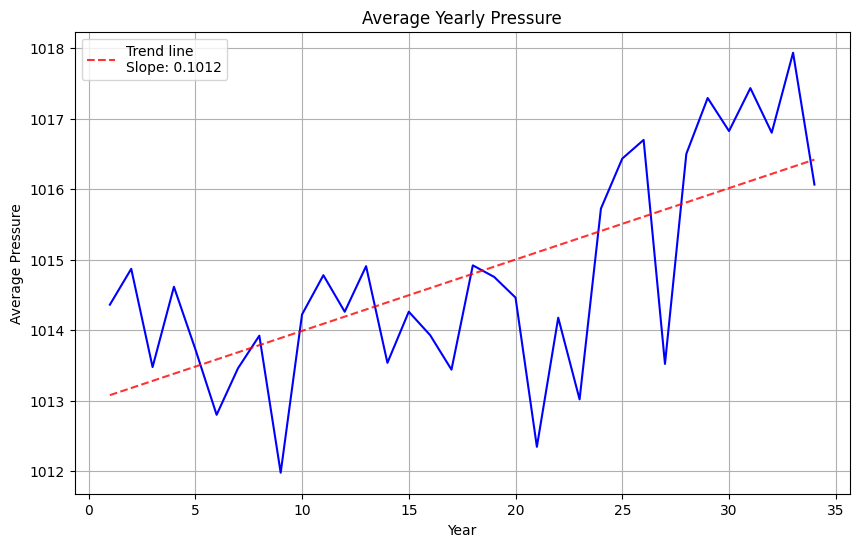

Pressure shows an increasing trend of 0.1012 units per year


In [ ]:
# Reorganise as a matrix of 365 days and 34 years
pressure_all = Data[:, :, 8]  # Get all pressure data

# Since 12419 days ≈ 34 years, let's reshape to get complete years
# 365 * 34 = 12410 days (we'll need to trim extra days to make it fit perfectly)
days_to_use = 365 * 34
pressure_reshaped = pressure_all[:days_to_use, :].reshape(34, 365, -1)  # -1 keeps all stations

print (pressure_reshaped.shape)

# Average across stations for each day
pressure_daily = torch.mean(pressure_reshaped, dim=2)  # Average across stations

# Average across days for each year
pressure_yearly = torch.mean(pressure_daily, dim=1)  # Get yearly averages

# Create years array for x-axis
years = np.arange(1, 1 + 34)  # Assuming data starts from 1989

# Plot a graph of the avergae pressure over the years
plt.figure(figsize=(10, 6))
plt.plot(years, pressure_yearly, 'b')
plt.xlabel('Year')
plt.ylabel('Average Pressure')
plt.title('Average Yearly Pressure')
plt.grid(True)

# Is the pressure increaing/ decresing or inconclusive?

# Calculate trend
z = np.polyfit(years, pressure_yearly, 1)
p = np.poly1d(z)
plt.plot(years, p(years), "r--", alpha=0.8, label=f'Trend line\nSlope: {z[0]:.4f}')
plt.legend()

plt.show()

# Print trend analysis
if abs(z[0]) > 0.01:
    if z[0] > 0:
        print(f"Pressure shows an increasing trend of {z[0]:.4f} units per year")
    else:
        print(f"Pressure shows a decreasing trend of {z[0]:.4f} units per year")
else:
    print("Pressure trend is inconclusive")

    # It appear that it is increasing.

**Linear Models for the Temp**

Let us extract a part of the temperature and see if we can model it


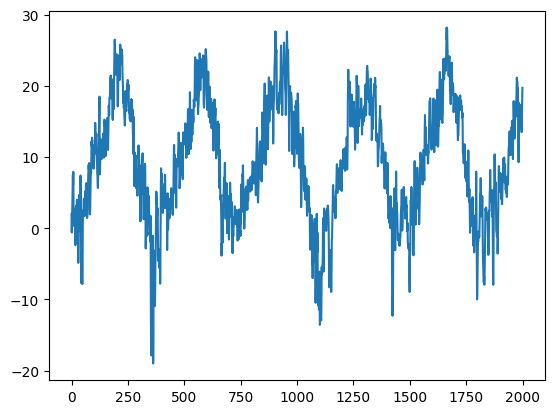

In [ ]:
Temp = Data[:2000,0,0]
plt.plot(Temp)

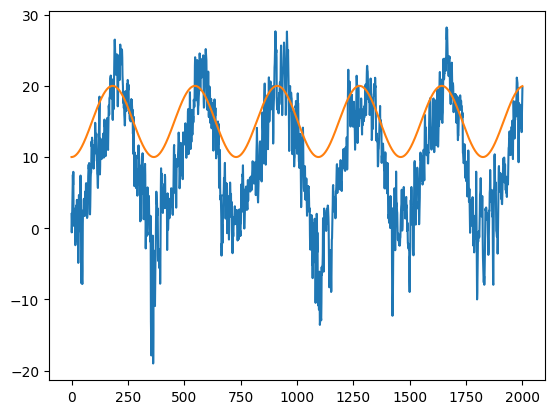

In [ ]:
# We now want to approximate the data with the model
t = np.linspace(0,2000,2000)
L = 365
a = np.array([0,0,20.0,10.0])
Tapprox = a[0] + a[1]*t + a[2]*np.sin(t/L*np.pi)**2 + a[3]*np.cos(t/L*np.pi)**2
plt.plot(t,Temp)
plt.plot(t,Tapprox)



**Questions 4**

4. The model above is a linear model in the coefficients
a[0] to a[3]
Use the least squares formulation and find the optimal coefficients. Plot the resulting fit.

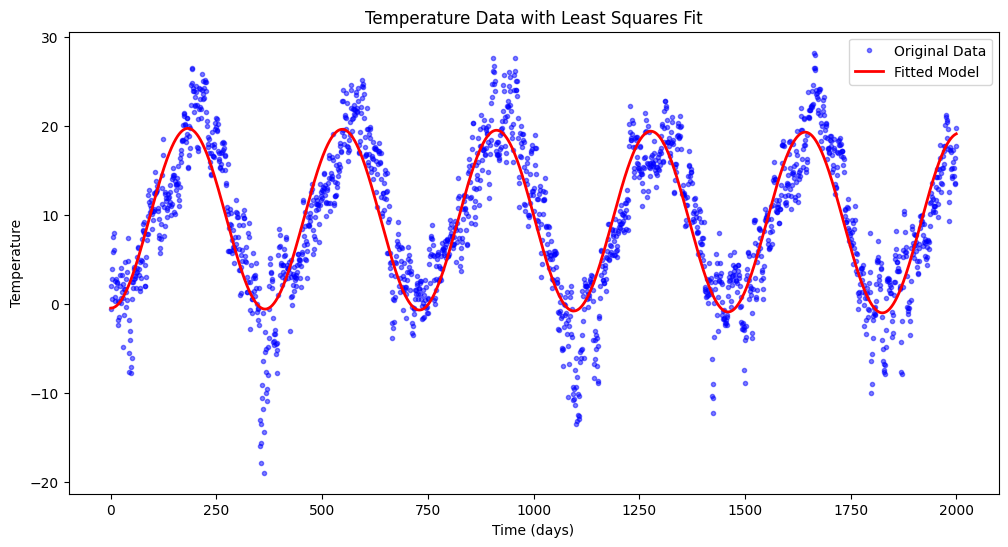

Optimal coefficients:
a[0] (constant term): 6.42
a[1] (linear trend): -0.00
a[2] (sin² term): 13.34
a[3] (cos² term): -6.92


In [ ]:
Temp = Data[:2000, 0, 0]
t = np.linspace(0, 2000, 2000)
L = 365

# Create matrix A for least squares
# Each column represents a different term in our model
A = np.zeros((2000, 4))
A[:, 0] = 1                                  # Constant term
A[:, 1] = t                                  # Linear term
A[:, 2] = np.sin(t/L*np.pi)**2              # Sin² term
A[:, 3] = np.cos(t/L*np.pi)**2              # Cos² term

# Solve least squares: find 'a' that minimizes ||A@a - Temp||²
output = np.linalg.lstsq(A, Temp, rcond=None)
a_optimal = output[0]

# Calculate the fitted temperature using optimal coefficients
Temp_fit = A @ a_optimal
Temp_fit = torch.tensor(Temp_fit) # make it a tensor not a tuple (make sure they are the same shape)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, Temp, 'b.', label='Original Data', alpha=0.5)
plt.plot(t, Temp_fit, 'r-', label='Fitted Model', linewidth=2)
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Temperature')
plt.title('Temperature Data with Least Squares Fit')
plt.show()

print("Optimal coefficients:")
print(f"a[0] (constant term): {a_optimal[0]:.2f}")
print(f"a[1] (linear trend): {a_optimal[1]:.2f}")
print(f"a[2] (sin² term): {a_optimal[2]:.2f}")
print(f"a[3] (cos² term): {a_optimal[3]:.2f}")

**Question 5-7**
5. We have a second model we want to use. It as the form
$$ T = a_0 + a_1t + a_2t^2 + a_3 |\sin(\pi/L t)| + a_ |\sin(2 \pi/L t)| + a_5 |\sin(3\pi/L t)| $$  

Setup a least square problem for the model and solve for the coefficients. Plot the solution.

6. Plot the data and the solution obtained by both models.

7. (Open discussion) Given the 2 models, which model you think is better? Why?


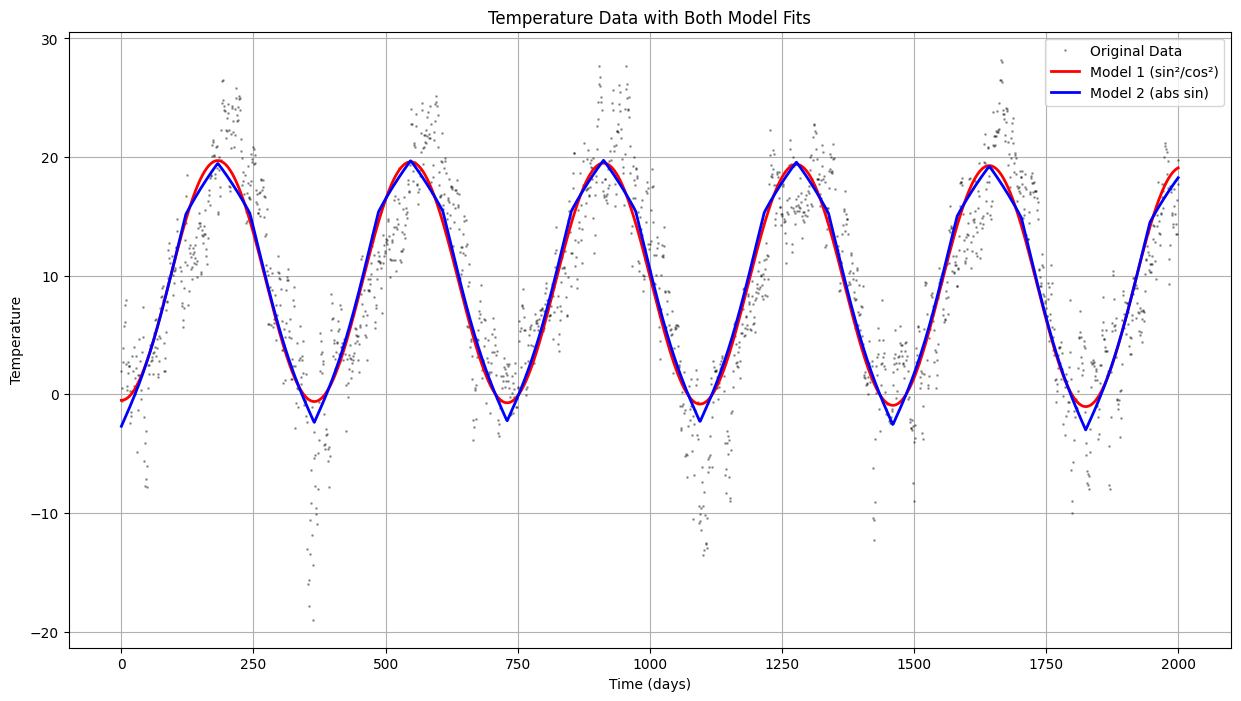

Model 1 coefficients:
a[0] (constant): 6.42
a[1] (linear): -0.00
a[2] (sin²): 13.34
a[3] (cos²): -6.92

Model 2 coefficients:
a[0] (constant): -2.70
a[1] (linear): 0.00
a[2] (quadratic): -0.00
a[3] (|sin(πt/L)|): 23.82
a[4] (|sin(2πt/L)|): -3.37
a[5] (|sin(3πt/L)|): -1.83

Sum of squared errors:
Model 1: 33624.28
Model 2: 33298.91


In [ ]:
# Second Model
A2 = np.zeros((2000, 6))
A2[:, 0] = 1                          # Constant term
A2[:, 1] = t                          # Linear term
A2[:, 2] = t**2                       # Quadratic term
A2[:, 3] = np.abs(np.sin(np.pi/L*t))  # |sin(π/L*t)|
A2[:, 4] = np.abs(np.sin(2*np.pi/L*t))# |sin(2π/L*t)|
A2[:, 5] = np.abs(np.sin(3*np.pi/L*t))# |sin(3π/L*t)| # we want to turn them into martix of each coeficent being a new culumn

# Solve second model
output2 = np.linalg.lstsq(A2, Temp, rcond=None) # find the coefficent
a2_optimal = output2[0]
Temp_fit2 = A2 @ a2_optimal

# Plot both models
plt.figure(figsize=(15, 8)) # plt the coefficent
plt.plot(t, Temp, 'k.', label='Original Data', alpha=0.3, markersize=2)
plt.plot(t, Temp_fit, 'r-', label='Model 1 (sin²/cos²)', linewidth=2)
plt.plot(t, Temp_fit2, 'b-', label='Model 2 (abs sin)', linewidth=2)
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Temperature')
plt.title('Temperature Data with Both Model Fits')
plt.grid(True)
plt.show()

# Print coefficients for both models
print("Model 1 coefficients:")
print(f"a[0] (constant): {a_optimal[0]:.2f}")
print(f"a[1] (linear): {a_optimal[1]:.2f}")
print(f"a[2] (sin²): {a_optimal[2]:.2f}")
print(f"a[3] (cos²): {a_optimal[3]:.2f}")

print("\nModel 2 coefficients:")
print(f"a[0] (constant): {a2_optimal[0]:.2f}")
print(f"a[1] (linear): {a2_optimal[1]:.2f}")
print(f"a[2] (quadratic): {a2_optimal[2]:.2f}")
print(f"a[3] (|sin(πt/L)|): {a2_optimal[3]:.2f}")
print(f"a[4] (|sin(2πt/L)|): {a2_optimal[4]:.2f}")
print(f"a[5] (|sin(3πt/L)|): {a2_optimal[5]:.2f}")

# Calculate and print error for both models
error1 = torch.sum((Temp - Temp_fit)**2)
error2 = torch.sum((Temp - Temp_fit2)**2)
print(f"\nSum of squared errors:")
print(f"Model 1: {error1:.2f}")
print(f"Model 2: {error2:.2f}")

## model 2 can be seen as better becasue it's shaperer and that accounts for the further, peaks and plummets.

In [ ]:
type(Temp_fit)

torch.Tensor

In [ ]:
type(Temp)

torch.Tensor